In [42]:
import glob, os, random, re, sys, ast
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

from itertools import product
from matplotlib.patches import Patch
from ipywidgets import interact, widgets
from IPython.display import set_matplotlib_formats
from statsmodels.tsa.stattools import grangercausalitytests

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_context("notebook")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data analysis

### File location and import

In [147]:
root = '/Users/beichenberger/Downloads/20190705_Out/'
files = glob.glob(f'{root}*.csv')
conditions = ['6h', 'As']
rnas = ['pIM52', '5\'TOP', 'ATF4']

In [148]:
# Import all csv files
li = []
for f in files:
    try:
        df_curr = pd.read_csv(f)
        li.append(df_curr)
    except:
        continue
df = pd.concat(li, axis=0, ignore_index=True)

### Data cleanup

In [149]:
def find_return(name, find_list):
    for i in find_list:
        if i in name:
            return i

df['condition'] = df.filename.apply(lambda x: find_return(x, conditions))
df['RNA'] = df.filename.apply(lambda x: find_return(x, rnas))

In [150]:
# Drop rows with probabilities above 0.3
indexNames = df[(df.img1_2_coloc_prob_cellbox >= 0.3)].index
df.drop(indexNames, inplace=True)

### Plotting

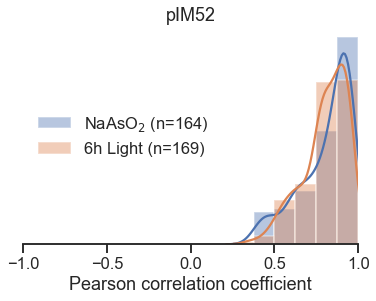

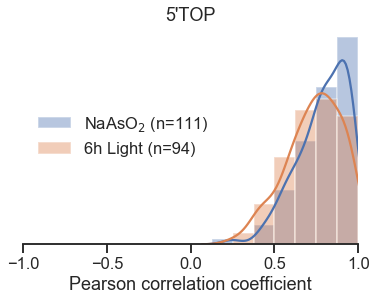

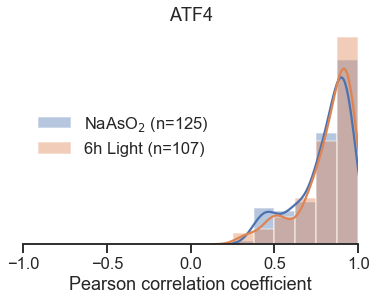

In [154]:
# Plot hist for both conditions (RNA seperately)
sns.set(style='ticks', context='talk', font='sans-serif')

for rna in rnas:
    df_plot = df[df.RNA == rna]
    plot = df_plot.img1_2_coloc_unscr_cellmask[df_plot.condition == 'As']
    sns.distplot(plot, bins=16, label=f'NaAsO$_2$ (n={len(plot)})', hist_kws={'range':(-1,1)})
    plot = df_plot.img1_2_coloc_unscr_cellmask[df_plot.condition == '6h']
    sns.distplot(plot, bins=16, label=f'6h Light (n={len(plot)})', hist_kws={'range':(-1,1)})
    
    plt.xlim(-1, 1)
    plt.xticks(np.arange(-1, 1.1, step=0.5))
    plt.yticks([])
    plt.xlabel('Pearson correlation coefficient')
    plt.ylabel('')
    sns.despine(trim=True, bottom=False, left=True)
    
    plt.title(f'{rna}')
    plt.legend(frameon=False, loc='center left')
    
    plt.savefig(f'0_OptoG_coloc_{rna}.pdf', bbox_inches='tight')
    plt.show()

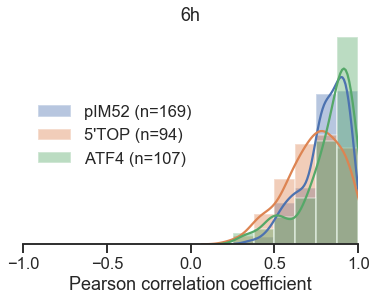

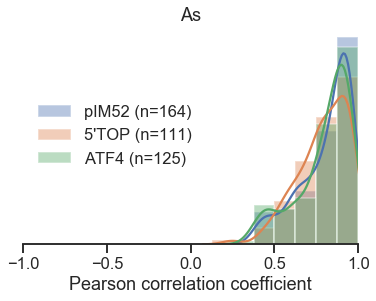

In [156]:
# Plot hist for all RNAs per condition
sns.set(style='ticks', context='talk', font='sans-serif')

for cond in conditions:
    df_plot = df[df.condition == cond]
    plot = df_plot.img1_2_coloc_unscr_cellmask[df_plot.RNA == 'pIM52']
    sns.distplot(plot, bins=16, label=f'pIM52 (n={len(plot)})', hist_kws={'range':(-1,1)})
    plot = df_plot.img1_2_coloc_unscr_cellmask[df_plot.RNA == '5\'TOP']
    sns.distplot(plot, bins=16, label=f'5\'TOP (n={len(plot)})', hist_kws={'range':(-1,1)})
    plot = df_plot.img1_2_coloc_unscr_cellmask[df_plot.RNA == 'ATF4']
    sns.distplot(plot, bins=16, label=f'ATF4 (n={len(plot)})', hist_kws={'range':(-1,1)})
    
    plt.title(cond)
    plt.xlim(-1, 1)
    plt.xticks(np.arange(-1, 1.1, step=0.5))
    plt.yticks([])
    plt.xlabel('Pearson correlation coefficient')
    plt.ylabel('')
    sns.despine(trim=True, bottom=False, left=True)
    
    plt.title(f'{cond}')
    plt.legend(frameon=False, loc='center left')
    
    #plt.savefig(f'0_OptoG_coloc_{cond}.pdf', bbox_inches='tight')
    plt.show()